In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingRegressor,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('spam.csv')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


## 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.sample(5)

,v1,v2
2510,ham,Yunny i'm walking in citylink now �_ faster co...
4205,ham,"Get the door, I'm here"
383,ham,Hey i will be late ah... Meet you at 945+
51,ham,"A gram usually runs like &lt;#&gt; , a half e..."
2308,spam,Moby Pub Quiz.Win a �100 High Street prize if ...


In [12]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [13]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

In [16]:
encoder.fit_transform(df['Target'])

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
df['Target'] = encoder.fit_transform(df['Target'])

In [19]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 2. Missing Value

In [20]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

## 3. Remove Duplicates Value

In [21]:
df.duplicated().sum()

403

In [22]:
df = df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

0

## 4. EDA

In [24]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [25]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

## 5. Visualization

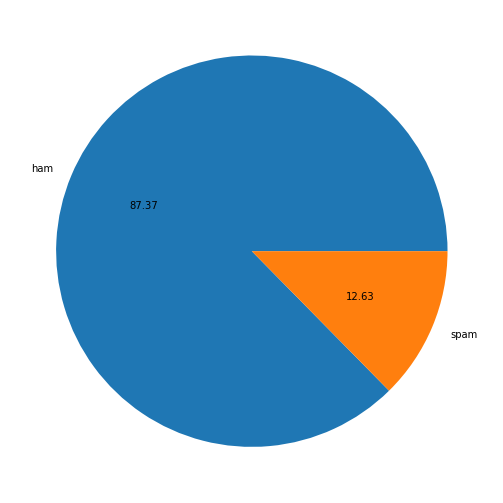

In [26]:
plt.figure(figsize=(16,9))
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [27]:
df['num_characters'] = df['Text'].apply(len)

In [28]:
df

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


## Number of Words

In [29]:
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [30]:
df['num_of_word'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df

,Target,Text,num_characters,num_of_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will �_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [32]:
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will �_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [33]:
df['no_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df

,Target,Text,num_characters,num_of_word,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [35]:
df.describe()

,Target,num_characters,num_of_word,no_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.923776,18.456375,1.962275
std,0.332253,58.174846,13.323322,1.433892
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


## Ham

In [36]:
df[df['Target'] == 0][['num_characters','num_of_word','no_sentences']].describe()

,num_characters,num_of_word,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


## Spam

In [37]:
df[df['Target'] == 1][['num_characters','num_of_word','no_sentences']].describe()

,num_characters,num_of_word,no_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


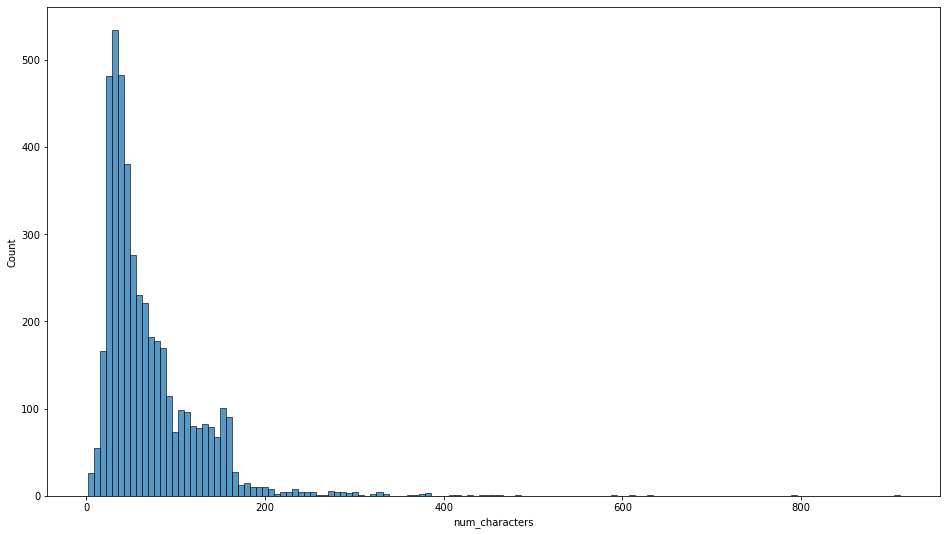

In [38]:
plt.figure(figsize=(16,9))
sns.histplot(df[df['Target'] == 0]['num_characters'])
plt.show()

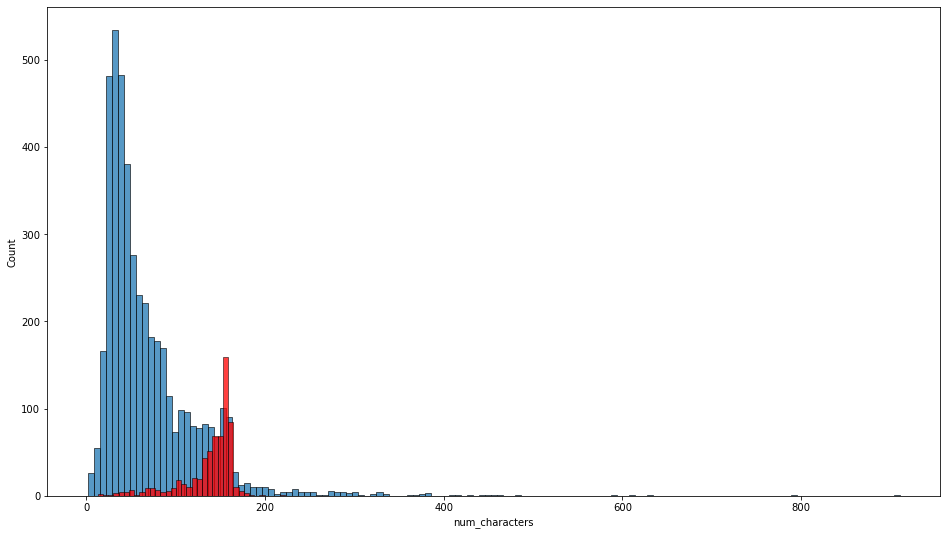

In [39]:
plt.figure(figsize=(16,9))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')
plt.show()

<Figure size 1152x648 with 0 Axes>

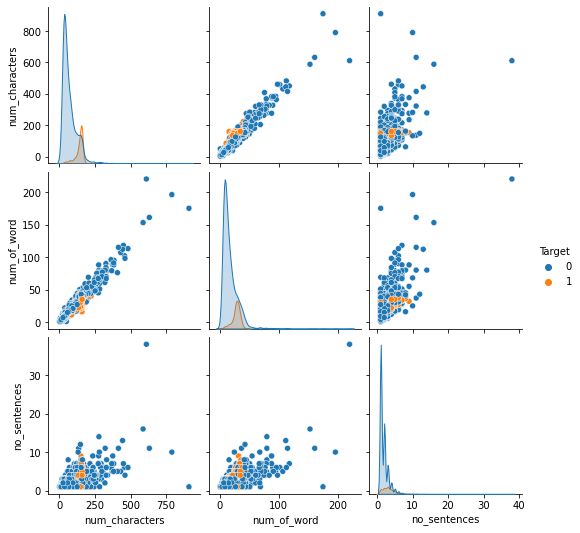

In [40]:
plt.figure(figsize=(16,9))
sns.pairplot(df,hue='Target')
plt.show()

In [41]:
df.corr()

,Target,num_characters,num_of_word,no_sentences
Target,1.000000,0.382785,0.263143,0.269132
num_characters,0.382785,1.000000,0.966087,0.626197
num_of_word,0.263143,0.966087,1.000000,0.680924
no_sentences,0.269132,0.626197,0.680924,1.000000


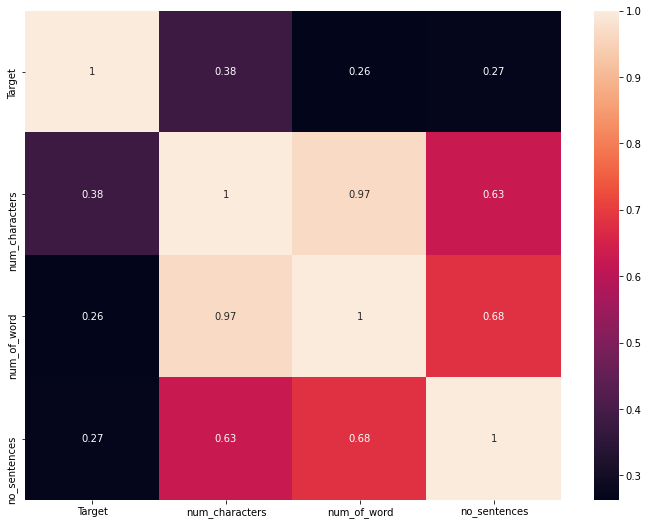

In [42]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

## 6. Data Preprocessing

### 1. Lower Case
### 2. Tokenization
### 3. Removing Special Characters
### 4. Removing Stop words and punctution

## Function Testing

In [43]:
def tranform_text(text):
    text = text.lower()
    return text

In [44]:
tranform_text('HOW ARE YOU')

'how are you'

In [45]:
ps = PorterStemmer()

In [46]:
def tranform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) 
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [47]:
tranform_text('I loved the youtube lecutures Machine Learning How about you>')

'love youtub lecutur machin learn'

In [48]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [49]:
tranform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [50]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [51]:
tranform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [52]:
df['transformed_text'] = df['Text'].apply(tranform_text)

In [53]:
df

,Target,Text,num_characters,num_of_word,no_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## Word Cloud visualization

In [54]:
wc = WordCloud(width=900,height=800,min_font_size=10,background_color='white')

In [55]:
spam_wc = wc.generate(df[df['Target'] ==1]['transformed_text'].str.cat(sep = " "))

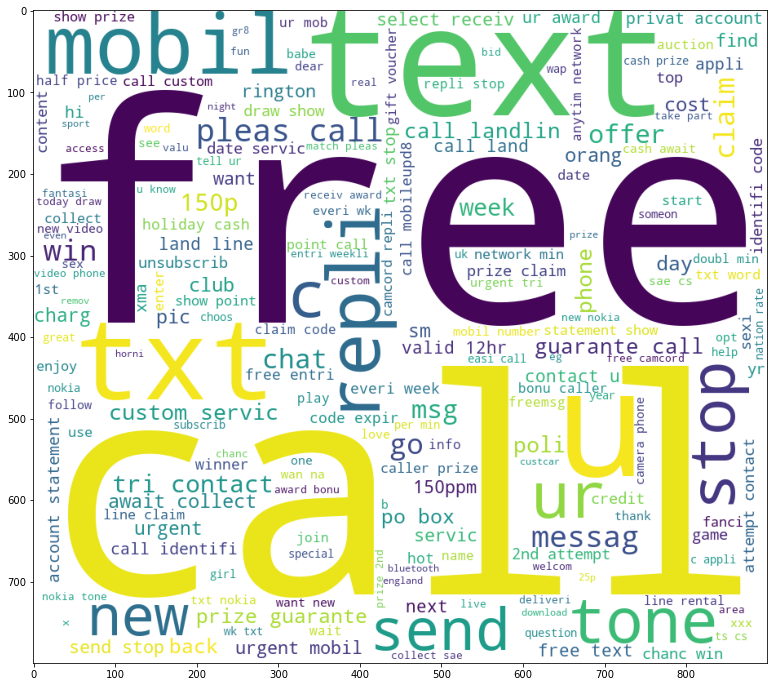

In [56]:
plt.figure(figsize=(16,12))
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['Target'] ==0]['transformed_text'].str.cat(sep = " "))

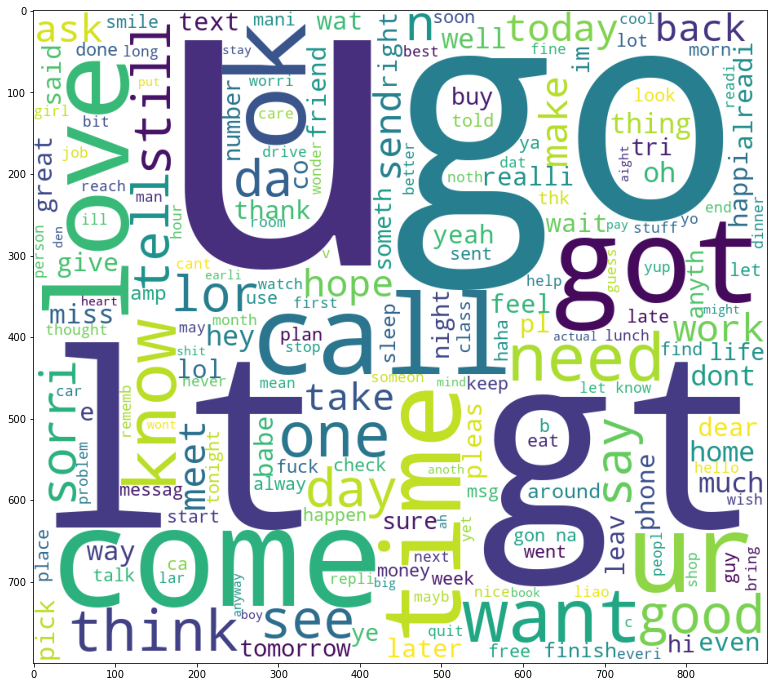

In [58]:
plt.figure(figsize=(16,12))
plt.imshow(ham_wc)

In [59]:
df.head()

,Target,Text,num_characters,num_of_word,no_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

9941

In [62]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

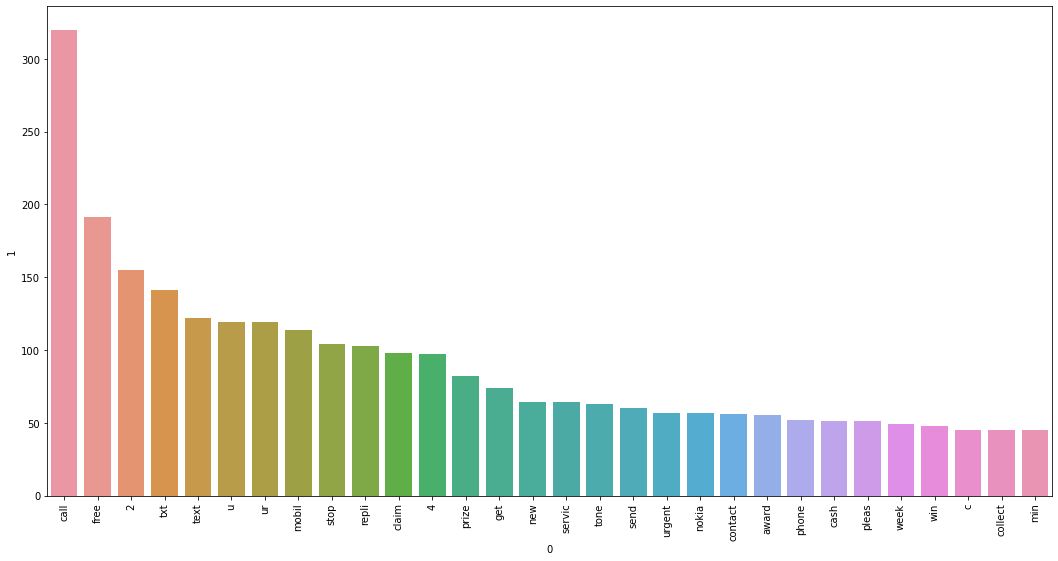

In [63]:
plt.figure(figsize=(18,9))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [64]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [65]:
len(ham_corpus)

35303

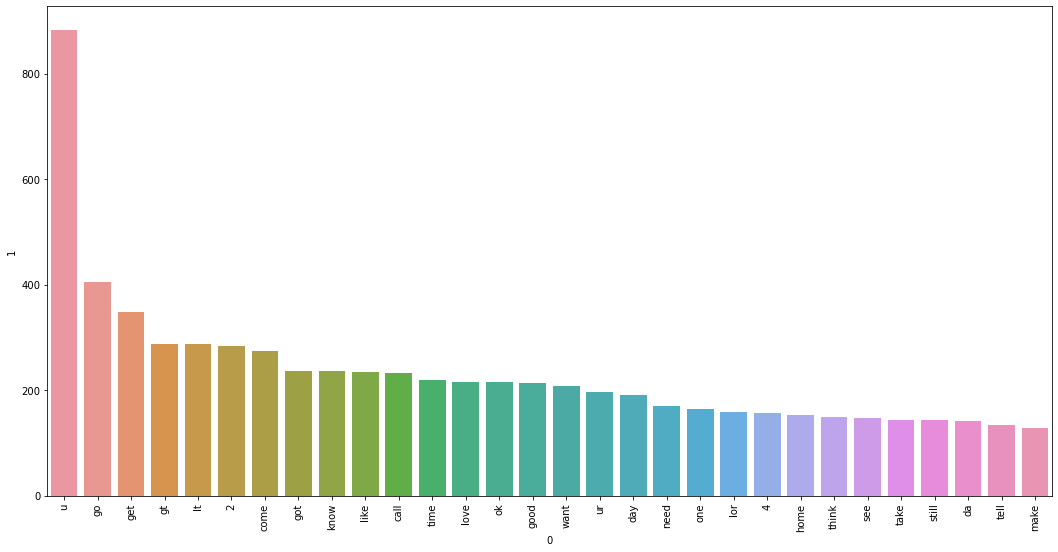

In [66]:
plt.figure(figsize=(18,9))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## 7. Model Building

In [67]:
df.head()

,Target,Text,num_characters,num_of_word,no_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## CountVectorizer Technique -1 

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
cv = CountVectorizer()

In [70]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [71]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
X.shape

(5169, 6677)

In [73]:
y = df['Target'].values

In [74]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## Model -1 

In [79]:
gnb.fit(x_train,y_train)
print("Accuracy of Training Model: ",gnb.score(x_train,y_train)*100,"%")
print("Accuracy of Testing Model:  ",gnb.score(x_test,y_test)*100,"%")
print("____________________________________________________")
y_pred = gnb.predict(x_test)
print("\n")
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred))
print("____________________________________________________")
print("Precission Score : ",precision_score(y_test,y_pred)*100,"%")

Accuracy of Training Model:  92.21281741233373 %
Accuracy of Testing Model:   87.81431334622823 %
____________________________________________________


Confusion Matrix :  [[790 106]
 [ 20 118]]
____________________________________________________
Precission Score :  52.67857142857143 %


## Model - 2

In [80]:
mnb.fit(x_train,y_train)
print("Accuracy of Training Model: ",gnb.score(x_train,y_train)*100,"%")
print("Accuracy of Testing Model:  ",gnb.score(x_test,y_test)*100,"%")
print("____________________________________________________")
y_pred2 = mnb.predict(x_test)
print("\n")
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred2))
print("____________________________________________________")
print("Precission Score : ",precision_score(y_test,y_pred2)*100,"%")

Accuracy of Training Model:  92.21281741233373 %
Accuracy of Testing Model:   87.81431334622823 %
____________________________________________________


Confusion Matrix :  [[872  24]
 [ 12 126]]
____________________________________________________
Precission Score :  84.0 %


## Model - 3

In [81]:
bnb.fit(x_train,y_train)
print("Accuracy of Training Model: ",gnb.score(x_train,y_train)*100,"%")
print("Accuracy of Testing Model:  ",gnb.score(x_test,y_test)*100,"%")
print("____________________________________________________")
y_pred3 = bnb.predict(x_test)
print("\n")
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred3))
print("____________________________________________________")
print("Precission Score : ",precision_score(y_test,y_pred3)*100,"%")

Accuracy of Training Model:  92.21281741233373 %
Accuracy of Testing Model:   87.81431334622823 %
____________________________________________________


Confusion Matrix :  [[894   2]
 [ 27 111]]
____________________________________________________
Precission Score :  98.23008849557522 %


## TfidfVectorizer Technique -2  : 

In [82]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [83]:
tfid  f = TfidfVectorizer()

SyntaxError: invalid syntax (<ipython-input-83-083d3691312c>, line 1)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X

In [ ]:
y = df['Target'].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
print("Accuracy of Training Model: ",gnb.score(x_train,y_train)*100,"%")
print("Accuracy of Testing Model:  ",gnb.score(x_test,y_test)*100,"%")
print("____________________________________________________")
y_pred = gnb.predict(x_test)
print("\n")
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred))
print("____________________________________________________")
print("Precission Score : ",precision_score(y_test,y_pred)*100,"%")

In [ ]:
mnb.fit(x_train,y_train)
print("Accuracy of Training Model: ",gnb.score(x_train,y_train)*100,"%")
print("Accuracy of Testing Model:  ",gnb.score(x_test,y_test)*100,"%")
print("____________________________________________________")
y_pred2 = mnb.predict(x_test)
print("\n")
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred2))
print("____________________________________________________")
print("Precission Score : ",precision_score(y_test,y_pred2)*100,"%")

In [ ]:
bnb.fit(x_train,y_train)
print("Accuracy of Training Model: ",gnb.score(x_train,y_train)*100,"%")
print("Accuracy of Testing Model:  ",gnb.score(x_test,y_test)*100,"%")
print("____________________________________________________")
y_pred3 = bnb.predict(x_test)
print("\n")
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred3))
print("____________________________________________________")
print("Precission Score : ",precision_score(y_test,y_pred3)*100,"%")

## Other ML Model for Comparision

In [ ]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC':svc,
    'KNC':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'AdaBoost':abc,
    'Bgc':abc,
    'Etc':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precission = precision_score(y_test,y_pred)
    
    return accuracy,precission

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precission - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({"Algorithms":clfs.keys(),'Accuracy':accuracy_scores,'Precission':precision_scores})

In [ ]:
performance_df

## Top Model bases on Precision

In [ ]:
desc_performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
desc_performance_df

## Top Model bases on Accuracy

In [ ]:
accu_performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [ ]:
accu_performance_df

## Model Improvement

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
print("Accuracy of Training Model: ",gnb.score(x_train,y_train)*100,"%")
print("Accuracy of Testing Model:  ",gnb.score(x_test,y_test)*100,"%")
print("____________________________________________________")
y_pred = gnb.predict(x_test)
print("\n")
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred))
print("____________________________________________________")
print("Precission Score : ",precision_score(y_test,y_pred)*100,"%")

In [ ]:
mnb.fit(x_train,y_train)
print("Accuracy of Training Model: ",gnb.score(x_train,y_train)*100,"%")
print("Accuracy of Testing Model:  ",gnb.score(x_test,y_test)*100,"%")
print("____________________________________________________")
y_pred2 = mnb.predict(x_test)
print("\n")
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred2))
print("____________________________________________________")
print("Precission Score : ",precision_score(y_test,y_pred2)*100,"%")

In [ ]:
bnb.fit(x_train,y_train)
print("Accuracy of Training Model: ",gnb.score(x_train,y_train)*100,"%")
print("Accuracy of Testing Model:  ",gnb.score(x_test,y_test)*100,"%")
print("____________________________________________________")
y_pred3 = bnb.predict(x_test)
print("\n")
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred3))
print("____________________________________________________")
print("Precission Score : ",precision_score(y_test,y_pred3)*100,"%")

In [ ]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC':svc,
    'KNC':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'AdaBoost':abc,
    'Bgc':abc,
    'Etc':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precission = precision_score(y_test,y_pred)
    
    return accuracy,precission

In [ ]:
accuracy_scores_3000 = []
precision_scores_3000 = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precission - ",current_precision)
    
    accuracy_scores_3000.append(current_accuracy)
    precision_scores_3000.append(current_precision)

In [ ]:
temp_df  = pd.DataFrame({"Algorithm":clfs.keys(),'accuracy_scores_3000':accuracy_scores_3000,'precision_scores_3000':precision_scores_3000})

In [ ]:
temp_df

In [ ]:
accu_performance_df

In [ ]:
temp_df.merge(accu_performance_df,on = 'Algorithm')

## Top accuracy Model

In [ ]:
accu_performance_df

In [ ]:
accu_performance_df_3000 = pd.DataFrame({'Algorithm':clfs.keys(),'accuracy_scores_3000':accuracy_scores_3000,'precision_scores_3000':precision_scores_3000}).sort_values('accuracy_scores_3000',ascending=False)

In [ ]:
accu_performance_df_3000

In [ ]:
accu_performance_df_3000.merge(accu_performance_df,on = 'Algorithm')

## Top Accuracy precission Model

In [ ]:
desc_performance_df

In [ ]:
dec_performance_df_3000 = pd.DataFrame({'Algorithm':clfs.keys(),'accuracy_scores_3000':accuracy_scores_3000,'precision_scores_3000':precision_scores_3000}).sort_values('precision_scores_3000',ascending=False)

In [ ]:
dec_performance_df_3000

In [ ]:
dec_performance_df_3000.merge(desc_performance_df,on = 'Algorithm')

## Voting Classifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(x_train,y_train)

In [ ]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

## Apply stacking

In [ ]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
mnb.fit(x_train,y_train)
print("Accuracy of Training Model: ",gnb.score(x_train,y_train)*100,"%")
print("Accuracy of Testing Model:  ",gnb.score(x_test,y_test)*100,"%")
print("____________________________________________________")
y_pred2 = mnb.predict(x_test)
print("\n")
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred2))
print("____________________________________________________")
print("Precission Score : ",precision_score(y_test,y_pred2)*100,"%")

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))